Dataset Shape: (1826, 7)
                 pm2.5       DEWP       TEMP         PRES         Iws  \
datetime                                                                
2010-01-01         NaN -18.750000  -6.750000  1017.083333   14.458333   
2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04   31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   56.920000   

                   Is   Ir  
datetime                    
2010-01-01   0.000000  0.0  
2010-01-02   0.708333  0.0  
2010-01-03  14.166667  0.0  
2010-01-04   0.000000  0.0  
2010-01-05   0.000000  0.0  


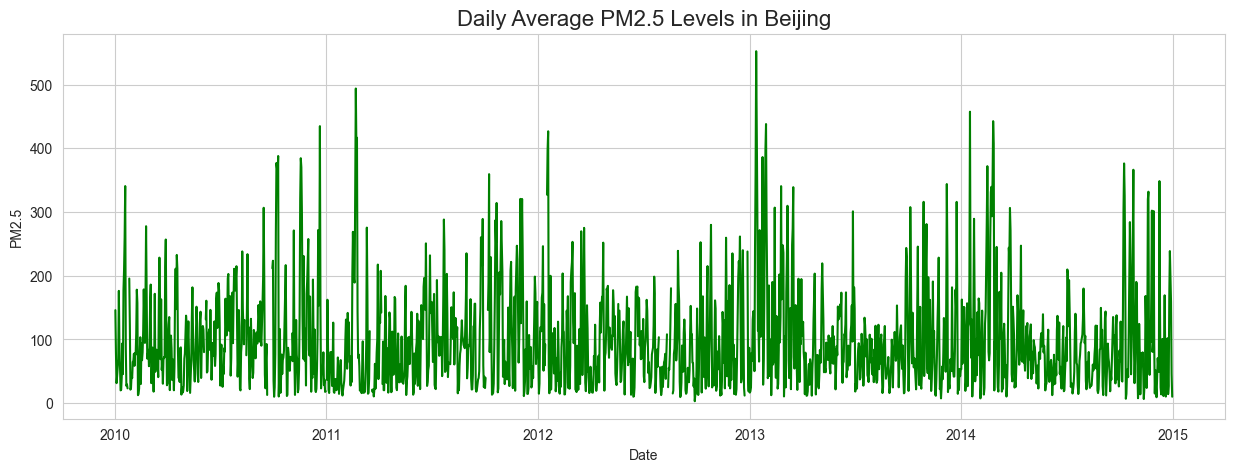

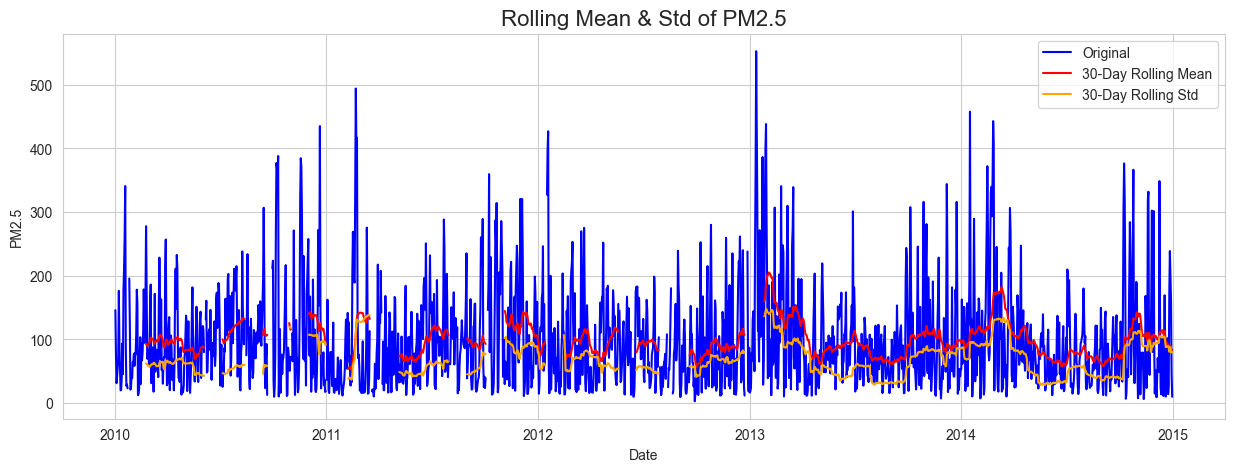

ADF Statistic: -19.777896974042726
p-value: 0.0
Critical Values: {'1%': np.float64(-3.43401669852096), '5%': np.float64(-2.863159643456451), '10%': np.float64(-2.5676322468019896)}
Series is stationary (reject H0)


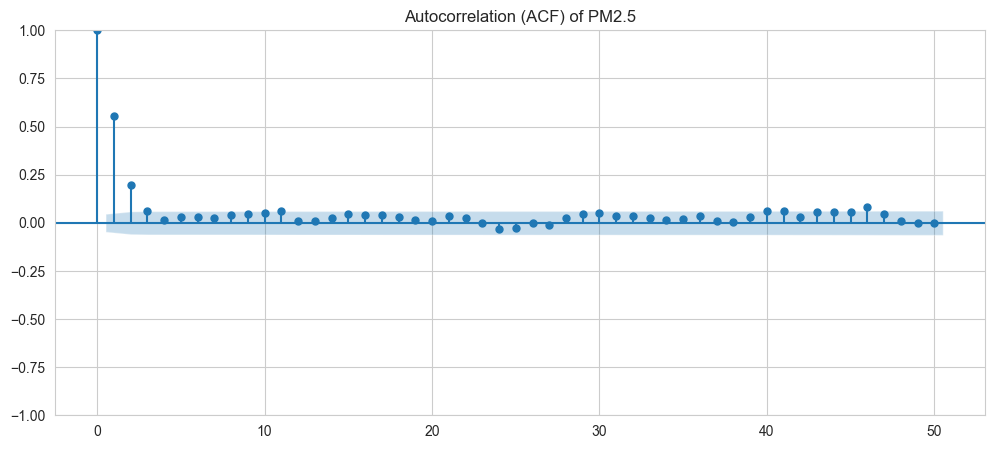

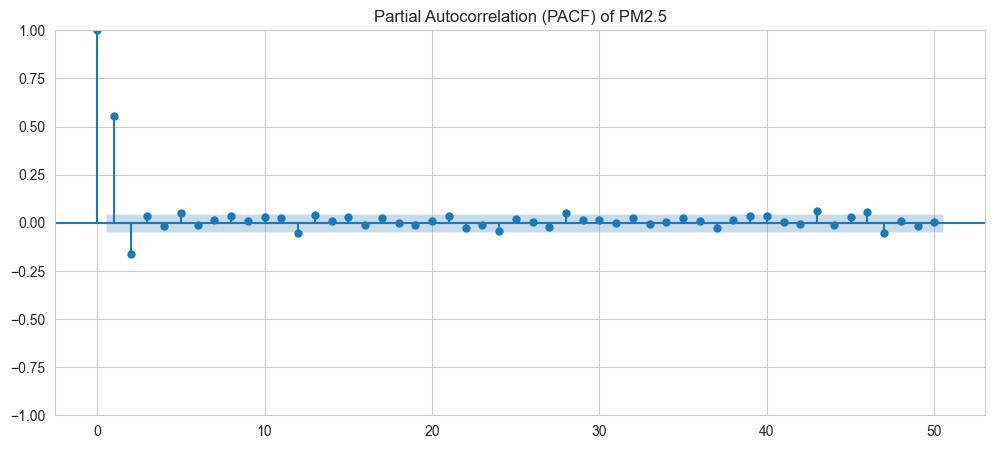

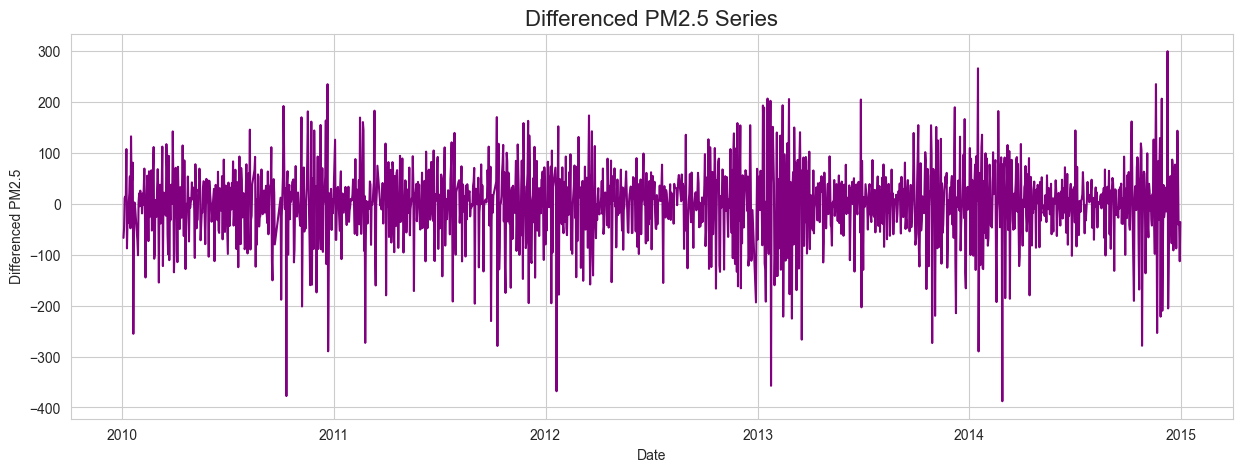

ADF Statistic (Differenced): -15.949594418993383
p-value (Differenced): 7.382682331815039e-29
Differenced series is stationary (ready for ARIMA)


In [2]:
# ===============================
# AirPulse: Step 2 – EDA & Stationarity Check
# ===============================

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style('whitegrid')
%matplotlib inline

# Step 2: Load processed daily PM2.5 data
data_path = '../data/processed/pm25_daily.csv'
df_daily = pd.read_csv(data_path, index_col='datetime', parse_dates=True)

# Step 3: Inspect dataset
print("Dataset Shape:", df_daily.shape)
print(df_daily.head())

# Step 4: Plot PM2.5 time series
plt.figure(figsize=(15,5))
plt.plot(df_daily['pm2.5'], color='green')
plt.title("Daily Average PM2.5 Levels in Beijing", fontsize=16)
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()

# Step 5: Rolling statistics for trend visualization
rolling_window = 30  # 30-day rolling mean
rolling_mean = df_daily['pm2.5'].rolling(window=rolling_window).mean()
rolling_std = df_daily['pm2.5'].rolling(window=rolling_window).std()

plt.figure(figsize=(15,5))
plt.plot(df_daily['pm2.5'], label='Original', color='blue')
plt.plot(rolling_mean, label=f'{rolling_window}-Day Rolling Mean', color='red')
plt.plot(rolling_std, label=f'{rolling_window}-Day Rolling Std', color='orange')
plt.title("Rolling Mean & Std of PM2.5", fontsize=16)
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()

# Step 6: Augmented Dickey-Fuller (ADF) Test for stationarity
result = adfuller(df_daily['pm2.5'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] <= 0.05:
    print("Series is stationary (reject H0)")
else:
    print("Series is non-stationary (fail to reject H0)")

# Step 7: Plot ACF and PACF
plt.figure(figsize=(12,5))
plot_acf(df_daily['pm2.5'].dropna(), lags=50, ax=plt.gca())
plt.title("Autocorrelation (ACF) of PM2.5")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(df_daily['pm2.5'].dropna(), lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation (PACF) of PM2.5")
plt.show()

# Step 8: Differencing if non-stationary
df_diff = df_daily['pm2.5'].diff().dropna()

plt.figure(figsize=(15,5))
plt.plot(df_diff, color='purple')
plt.title("Differenced PM2.5 Series", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Differenced PM2.5")
plt.show()

# ADF test on differenced series
result_diff = adfuller(df_diff)
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])

if result_diff[1] <= 0.05:
    print("Differenced series is stationary (ready for ARIMA)")
else:
    print("Series still non-stationary")
